Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).




In [1]:
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# loading dataset
data = pd.read_csv('bank-full.csv')
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.tail(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Data properties:

1. age - is numeric type and gives the age of customer.

    min-18,max-95,iqr-15,has outlier on right,mean-40.93621021,is right skewed


2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'). 

3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4. education (categorical:'unknown','secondary','tertiary' and 'primary')

5. default: has credit in default? (categorical: 'no','yes')

6. balance: average yearly balance. 

    min-8019,max-102127,iqr	1356,outlier on right, outlier on left, mean 1362.272058,is right skewed


7. housing: has housing loan? (categorical: 'no','yes')

8. loan: has personal loan? (categorical: 'no','yes')

9. contact: contact communication type (categorical: 'cellular','telephone',unkown')

10. day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    
    min	1,max	31,iqr	13,no outliers at both sides,mean 15.80641879,is left skewed


11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

    min	0,max	4918,iqr	216,outlier on right,mean	258.1630798,is right skewed	


13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    
    min	1,max	63,iqr	0,outlier on right,MEAN	2.765317408,is RIGHT skewed	


14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) 
    
    min	-1,max	871,MEAN	40.19782796, is right skeewed


15. previous: number of contacts performed before this campaign and for this client (numeric)

16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown','success','other')

Output variable (desired target):
17. - y - has the client subscribed a term deposit? (binary: 'yes','no')



#

There are 452111 records with 16 feature column and 1 output i.e Target column

All column are non-null with some of the columns being object type and rest numerical type

In [5]:
data.shape

(45211, 17)

In [6]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature]).codes # Replace strings with an integer

In [7]:
data.info()
data.tail(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int8
marital      45211 non-null int8
education    45211 non-null int8
default      45211 non-null int8
balance      45211 non-null int64
housing      45211 non-null int8
loan         45211 non-null int8
contact      45211 non-null int8
day          45211 non-null int64
month        45211 non-null int8
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int8
Target       45211 non-null int8
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45196,25,8,2,1,0,358,0,0,0,16,9,330,1,-1,0,3,1
45197,36,4,2,1,0,1511,1,0,0,16,9,270,1,-1,0,3,1
45198,37,4,1,2,0,1428,0,0,0,16,9,333,2,-1,0,3,0
45199,34,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,1,0
45200,38,9,1,1,0,557,1,0,0,16,9,1556,4,-1,0,3,1
45201,53,4,1,2,0,583,0,0,0,17,9,226,1,184,4,2,1
45202,34,0,2,1,0,557,0,0,0,17,9,224,1,-1,0,3,1
45203,23,8,2,2,0,113,0,0,0,17,9,266,1,-1,0,3,1
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1


In [8]:
# Statistical inference of the dataset( mean , median ,std , quartiles, min ,max)
data.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [9]:
# correlation of the attributes:
cor = data.corr()
cor


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


In [10]:
# There is not much correlation between the features and the target as well as amoung the features as is evident from corr table
# except between pdays and poutcome which shows hight -ve correlation (-0.858) which is obvious if the customer is contactacted long back than likely the success will be very less
# in other words customer who are contacted recently have more chances of taking term deposit.

C:\Users\ttc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


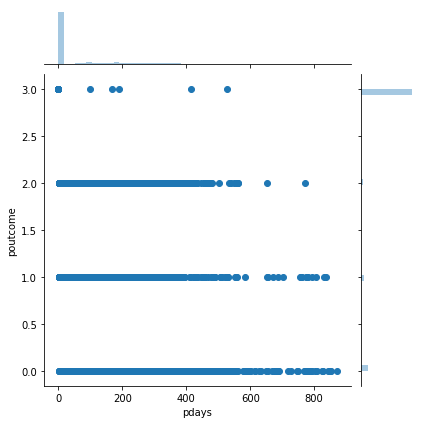

In [11]:
sns.jointplot(x = data.pdays,y = data.poutcome,data=data)
# poutcome 0-failure ,1-other, 2-success, 3- unknown
# as can be seen if pdays is more than 500 the success is very less or no success

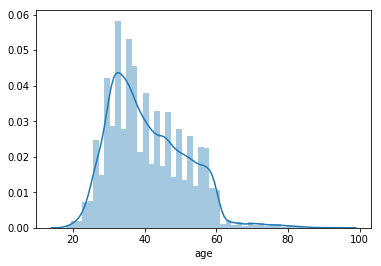

In [12]:
sns.distplot(data.age)
# age is right skeewed with max count in age group of 30-40

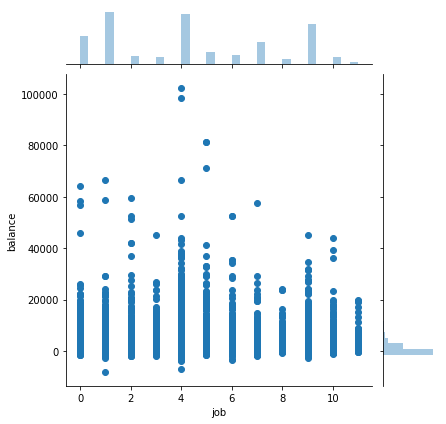

In [13]:
sns.jointplot(data.job,data.balance)

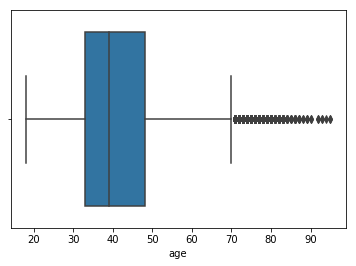

In [14]:
sns.boxplot(data.age)

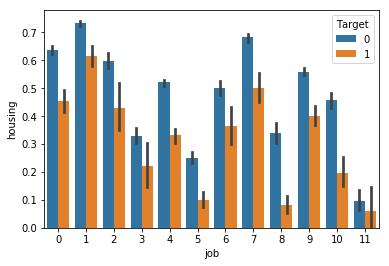

In [15]:
sns.barplot(x='job',y = 'housing',hue='Target',data=data)

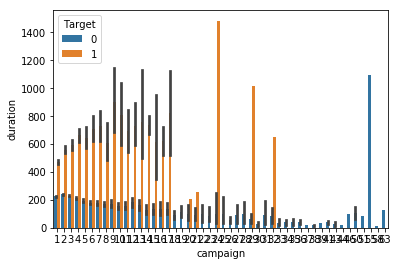

In [16]:
sns.barplot(x='campaign',y = 'duration',hue='Target',data=data)
# shows the impact of campaigning too much can lead to Target being in 'no' category

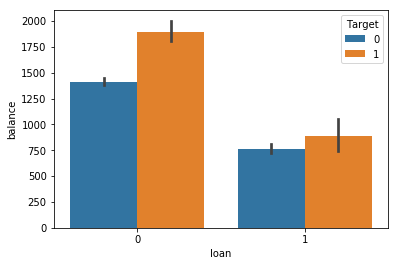

In [17]:
sns.barplot(x='loan',y = 'balance',hue='Target',data=data)
# shows that people with no loan and high balance are likely to take term deposit

In [61]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, train_size=0.3, random_state=5)
print('Original:', (data.Target).mean(), 'Train:', (train.Target).mean(), 'Test:', (test.Target).mean())



C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Original: 0.11698480458295547 Train: 0.11708324117083241 Test: 0.11694261880687563


In [19]:
# Logistic regression analysis with scaling of the dataset
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
def LRmodel(train , validate , c, l_1 = False):
    '''Fits the Logistic Regression Model on the training data set and calculates evaluation metrics on the validation set
    with the regularization constant C'''
    X=list(train.columns) #Create list of column labels from training data
    Y='Target'
    X.remove('Target')
    scaler = StandardScaler().fit(train[X]) #Standardize features by removing the mean and scaling to unit variance
    train_std = scaler.transform(train[X]) #Compute the mean and standard deviation on training set
    validate_std = scaler.transform(validate[X])
    xtrain = train_std
    ytrain = train[Y]
    xval = validate_std
    yval = validate[Y]
    if l_1:
        logreg = LogisticRegression(C = c, penalty= 'l1') #Apply logistic regression on L1 penalty
    else:
        logreg = LogisticRegression(C=c)
    logreg.fit(xtrain,ytrain)
    pred_proba_val = logreg.predict_proba(xval)[:,1]
    auc = metrics.roc_auc_score(yval, pred_proba_val)
    fpr, tpr, threshold = metrics.roc_curve(yval, pred_proba_val)
    accuracy = metrics.accuracy_score(yval, logreg.predict(xval))
    print(classification_report(yval, logreg.predict(xval)))
    print(metrics.confusion_matrix(yval, logreg.predict(xval)))
    return accuracy
LRmodel(train,test,.001) 




C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ttc\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  del sys.path[0]
C:\Users\ttc\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     27946
           1       0.63      0.15      0.24      3702

   micro avg       0.89      0.89      0.89     31648
   macro avg       0.77      0.57      0.59     31648
weighted avg       0.87      0.89      0.86     31648

[[27623   323]
 [ 3145   557]]


0.8904196157735086

In [20]:
# Simple logistic regression model performs good with 89 % accuracy.The recall value for the class 1 is poor but good for precision.

In [22]:
# import Gaussian Naive Bayes libraries 
from sklearn.naive_bayes import GaussianNB
X = data.iloc[:,0:16]
y = data.iloc[:,16]

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# making Gaussian Naive Bayes prediction
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Finding the accuracy of the prediction

print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
metrics.accuracy_score(y_test, y_pred, normalize = True)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     12013
           1       0.35      0.45      0.39      1551

   micro avg       0.84      0.84      0.84     13564
   macro avg       0.64      0.67      0.65     13564
weighted avg       0.86      0.84      0.85     13564

[[10707  1306]
 [  850   701]]


0.841049837805957

In [23]:
# Gaussian Naive Bayes model does not perform as good as LR model.Both the recall and and precision are very less .Reject the model


In [62]:
# normalizing data using z score
from scipy.stats import zscore
X_z = X.apply(zscore)
X_z = np.array(X_z)

y_z = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X_z, y_z, test_size=0.3, random_state=seed)
X_z.shape,y_z.shape

((45211, 16), (45211,))

In [25]:
# applying KNN model to the normalized data and getting accuracy , confusion matrix and classification report
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
NNH.fit(X_train, y_train)
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
print(NNH.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, predicted_labels))

0.8987761722205839
[[10707  1306]
 [  850   701]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12013
           1       0.61      0.33      0.42      1551

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.76      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564



In [ ]:
# With NNH the precision for class 1 is good but less than Log Reg . The accuracy is 89.87 for the normalized dataset as copare to the logreg previously which was done on raw data

In [28]:
# making Gaussian Naive Bayes prediction
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Finding the accuracy of the prediction

print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred, normalize = True))
# The values are very poor both for precision and recall .

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     12013
           1       0.34      0.48      0.40      1551

   micro avg       0.83      0.83      0.83     13564
   macro avg       0.64      0.68      0.65     13564
weighted avg       0.86      0.83      0.85     13564

[[10578  1435]
 [  806   745]]
0.8347832497788263


In [29]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.accuracy_score(y_test, y_predict, normalize = True))




C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.21      0.31      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.73      0.60      0.62     13564
weighted avg       0.87      0.89      0.87     13564

[[11758   255]
 [ 1223   328]]
0.8910350928929519


In [30]:
# comparing the above models the accuracy in decreasing order of percentage is KNN(89.87 %)> LR (89.10 %)> GNB (83.47%)
#In GNB the features are assumed to be independent of each other where as LR splits feature space linearly. Log Reg performs-
# well over GNB as in latter case assume feature independence where as in our data there are some feature which are co related to each other


In [72]:
model = AdaBoostClassifier(n_estimators=50,learning_rate=0.5)
model.fit(X_train,y_train)
y_ada_pred = model.predict(X_test)
print(classification_report(y_test, y_ada_pred))
print(metrics.confusion_matrix(y_test, y_ada_pred))
print(metrics.accuracy_score(y_test, y_ada_pred, normalize = True))
# The mode is less effective as compare to bagging classifier

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.62      0.30      0.40      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.64      0.67     13564
weighted avg       0.88      0.90      0.88     13564

[[11749   281]
 [ 1078   456]]
0.8998083161309348


In [76]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_dt_pred = model.predict(X_test)
print(classification_report(y_test, y_dt_pred))
print(metrics.confusion_matrix(y_test, y_dt_pred))
print(metrics.accuracy_score(y_test, y_dt_pred, normalize = True))
print(model.score(X_train, y_train))
# The model is overfit as no parameters are supplied for DT classifier
# Also the precision and recall are very low for class 1 46 and 48 percent resp.

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12030
           1       0.46      0.48      0.47      1534

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.88      0.88      0.88     13564

[[11160   870]
 [  798   736]]
0.8770274255381894
1.0


In [77]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_rt_pred = model.predict(X_test)
print(classification_report(y_test, y_rt_pred))
print(metrics.confusion_matrix(y_test, y_rt_pred))
print(metrics.accuracy_score(y_test, y_rt_pred, normalize = True))
print(model.score(X_train, y_train))
# The model is performing good with 90 perc of score.The precision and recall for class 1 is 60 and 37 perc resp not ok for recall
# As compare to this the bagging clf at the last of this notebook works good with greater values for precision and recall andfor model score
# The precision values for any class is the no of prediction in that class out of total for that class


C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12030
           1       0.60      0.37      0.45      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.76      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564

[[11658   372]
 [  974   560]]
0.9007667354762607
0.9919739627768824


In [92]:
model = GradientBoostingClassifier(learning_rate=.3)
model.fit(X_train,y_train)
y_gb_pred = model.predict(X_test)
print(classification_report(y_test, y_gb_pred))
print(metrics.confusion_matrix(y_test, y_gb_pred))
print(metrics.accuracy_score(y_test, y_gb_pred, normalize = True))
print(model.score(X_train, y_train))
# This model by far outweights all other model 
# With good precision ( 66 % ) and recall(41%) values
# With Good score (90.89%)
# With different learning rate the vlaue for .3 is best value. Though the value for precision is 1 less than learning rate of 0.1
# but recall is 44 % compare to 41 %
# overall score too is better

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12030
           1       0.65      0.44      0.52      1534

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.79      0.70      0.74     13564
weighted avg       0.90      0.91      0.90     13564

[[11671   359]
 [  861   673]]
0.9100560306694191
0.9201820077732487


In [31]:
# performing cross validation for the dataset.
# Grid search is used for best hyperparameter values. 
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
# split data into X and y
X = data.iloc[:,0:16]
Y = data.iloc[:,16]
# prepare models
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' CART ' , DecisionTreeClassifier()))
models.append(( ' NB ' , GaussianNB()))
#models.append(( ' SVC ' , svm.SVC(kernel='linear', C=1)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

 LR : 0.887061 (0.121130)
 LDA : 0.886597 (0.118180)
 KNN : 0.874498 (0.114539)
 CART : 0.800665 (0.103606)
 NB : 0.814798 (0.156130)


In [32]:
# above shows the kfold corss validation results for deifferent models LR > LDA > KNN > NB > CART

In [33]:
# Used Grid Search :GridSearch takes a dictionary of all of the different hyperparameters that you want to test, 
# and    feeds all of the different combinations through the algorithm for you and then reports back to you
#Which one had the highest accuracy
#let’s us tune the ‘C value’ also known as the ‘regularization strength’ of our logistic regression as well as ‘penalty’ of our logistic regression algorithm.

cs = np.logspace(-4,5,10)
logit = LogisticRegression()
penalty = ['l1','l2']
hyperparam = dict(C=cs,penalty=penalty)
clf = GridSearchCV(logit,hyperparam,cv=5,verbose=0)
best_model = clf.fit(X,Y)
print('Best Penalty:',best_model.best_estimator_.get_params()['penalty'])
print('Best C:',best_model.best_estimator_.get_params()['C'])

C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

Best Penalty: l1
Best C: 0.0001


In [35]:
    # finding cross validation for best hyper parameter values ( C = .001,penalty = l1) of Log Reg   
    results = []
    #names = []
    scoring = 'accuracy'

    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(LogisticRegression(C=.0001,penalty='l1'), X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    #names.append(name)
    msg = "%s: %f (%f)" % ('LR', cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

LR: 0.885800 (0.123572)


In [48]:
    # choosing hyperparameter for CART or Decision tree . Here max_depth is choosen but we can also work with max_sample_split and Leaf
    # the score is max with max depth is 8 and max features = 13
    results = []
    #names = []
    scoring = 'accuracy'
    for i in range(1,11): 
        kfold = KFold(n_splits=10, random_state=7)
        cv_results = cross_val_score(DecisionTreeClassifier(criterion='entropy',max_depth=i,max_features=i+5), X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        #names.append(name)
        msg = "%s: %f (%f)" % ('CART', cv_results.mean(), cv_results.std())
        print(msg,i,i+5)

CART: 0.883013 (0.124568) 1 6
CART: 0.880735 (0.123574) 2 7
CART: 0.879828 (0.124291) 3 8
CART: 0.882593 (0.124160) 4 9
CART: 0.884141 (0.121454) 5 10
CART: 0.884628 (0.117368) 6 11
CART: 0.875050 (0.125390) 7 12
CART: 0.874674 (0.127931) 8 13
CART: 0.878236 (0.117004) 9 14
CART: 0.853330 (0.109842) 10 15


In [50]:
    # the score is max with max depth is 6 and max features = 11
    results = []
    #names = []
    scoring = 'accuracy'

    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features=11), X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    #names.append(name)
    msg = "%s: %f (%f)" % ('CART', cv_results.mean(), cv_results.std())
    print(msg)


CART: 0.884385 (0.123869)


In [39]:
# The cross validation results for LR is more than CART  

In [40]:
# lets check one more model KNN for its hyper parameter . We will take different k value 
res = []
for i in range(1,11):
    
    KNN = KNeighborsClassifier(n_neighbors=i,weights='distance')
    KNN.fit(X_train,y_train)
    pred = KNN.predict(X_test)
    result=KNN.score(X_test,y_test)
    res.append(result)
    print(i)
res

1
2
3
4
5
6
7
8
9
10


[0.8773960483633146,
 0.8773960483633146,
 0.8946475965791801,
 0.8943526983190799,
 0.8984075493954585,
 0.8987761722205839,
 0.8987761722205839,
 0.8998820406959599,
 0.898997345915659,
 0.8994396933058095]

In [43]:
    # the score is max with n_neighbors = 8
    results = []
    #names = []
    scoring = 'accuracy'

    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(KNeighborsClassifier(n_neighbors=8,weights='distance'), X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    #names.append(name)
    msg = "%s: %f (%f)" % ('KNN', cv_results.mean(), cv_results.std())
    print(msg)


KNN: 0.877064 (0.116644)


In [42]:
# the kfold result for KNN is 87.7 % less than CART where CART is less than LR
# LogReg model is working good with the dataset. 

# Ensemble Prediction

In [52]:
    # Bagging Algorithm
    # Bagging Decision Tree works well with high variance like in Decision Tree
    from sklearn.ensemble import BaggingClassifier
    X = data.iloc[:,0:16]
    Y = data.iloc[:,16]

    
    results = []
    
    scoring = 'accuracy'

    kfold = KFold(n_splits=10, random_state=7)
    cart = DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features=11)
    cv_results = cross_val_score(BaggingClassifier(base_estimator=cart, n_estimators=12, random_state=seed), X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    #names.append(name)
    msg = "%s: %f (%f)" % ('BAG_DT', cv_results.mean(), cv_results.std())
    print(msg)
    
    # Bagging with DT is more effective as compare to base model DT (88.7 % vs 88.43% )

BAG_DT: 0.887061 (0.120440)


In [53]:
    from sklearn.ensemble import BaggingClassifier
    X = data.iloc[:,0:16]
    Y = data.iloc[:,16]

    
    results = []
    
    scoring = 'accuracy'

    kfold = KFold(n_splits=10, random_state=7)
    logreg = LogisticRegression(C=.001,penalty='l1')
    cv_results = cross_val_score(BaggingClassifier(base_estimator=logreg, n_estimators=12, random_state=seed), X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    #names.append(name)
    msg = "%s: %f (%f)" % ('BAG_LR', cv_results.mean(), cv_results.std())
    print(msg)
    
    # BAG_LR is almost equal to base model 88.5%

C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

BAG_LR: 0.885292 (0.123905)


In [54]:
    from sklearn.ensemble import BaggingClassifier
    X = data.iloc[:,0:16]
    Y = data.iloc[:,16]

    
    results = []
    
    scoring = 'accuracy'

    kfold = KFold(n_splits=10, random_state=7)
    knn = KNeighborsClassifier(n_neighbors=8,weights='distance')
    cv_results = cross_val_score(BaggingClassifier(base_estimator=knn, n_estimators=12, random_state=seed), X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    #names.append(name)
    msg = "%s: %f (%f)" % ('BAG_knn', cv_results.mean(), cv_results.std())
    print(msg)

BAG_knn: 0.876665 (0.117209)


In [55]:
# in above bagging algorith with different base estimator it is observed that CART as base model works well as compare to LogReg or KNN

In [56]:
# Ensemble with RF classifier
# For RF the base estimator is CART 
from sklearn.ensemble import RandomForestClassifier

seed = 7
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=seed)
# For Tuning The Random forest the we can use min_sample_split and min_sample_leaf and loop for different values of these
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8837874478537968


In [57]:
# ENsemble with Random forest as compare to CART is  88.37% for the former as against 88.7% for CART 

In [58]:
# Also Bagging with base as Log Reg(88.5%) is almost equal to the score achieved by simple Log Reg(88.5%)

In [59]:
# Boosting Algorithms
#Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.
#Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.
#The two most common boosting ensemble machine learning algorithms are:
#AdaBoost
#Stochastic Gradient Boosting
#1. AdaBoost
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8836989620700724


In [60]:
# Let us try for different learning rate of ada boosting
lr = [0.1,0.3,0.5,1.0,1.5,2.0]
seed = 7
num_trees = 30
kfold = KFold(n_splits=10, random_state=seed)
result = []
for i in lr:
    model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed,learning_rate=i)
    result.append((cross_val_score(model, X, Y, cv=kfold)).mean())
result

[0.8829026731706898,
 0.8870610452122735,
 0.8873485873237291,
 0.8836989620700724,
 0.8814427995904122,
 0.6258356526000195]

Ada Boosting with learning rate as 0.5 is the best performing model with 88.734% of score

In [63]:
#Gradient Boosting
#Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8873265221291256


In [64]:
# The score for AdaBoosting and Gradient Boosting is same 88.73%

In [66]:
#Voting Ensemble
#Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.
#It works by first creating two or more standalone models from your training dataset. 
#A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data

from sklearn.ensemble import VotingClassifier
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = KNeighborsClassifier()
estimators.append(('knn', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators,voting='hard')
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ttc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

0.8831460359787403


In [67]:
# In the following lines, we call the bagging classifer with oob_score (out of bag score) set to true which false by default
# This makes the baggingclassifier use the 37% unused data for testing
# Compare the performance of the BGCL with regularized dt above. 
# Though not required, you can keep separate test data (outside the bootstrap sampling) on which we test the BGCL
# 

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples=.7 , oob_score=True)

bgcl = bgcl.fit(X_train, y_train)
print(bgcl.oob_score_)

0.9027079975985085


In [78]:
y_bgcl_pred = bgcl.predict(X_test)
print(classification_report(y_test, y_bgcl_pred))
print(metrics.confusion_matrix(y_test, y_bgcl_pred))
print(metrics.accuracy_score(y_test, y_bgcl_pred, normalize = True))
bgcl.score(X_train,y_train)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     12030
           1       0.61      0.45      0.52      1534

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.77      0.71      0.73     13564
weighted avg       0.90      0.91      0.90     13564

[[11595   435]
 [  849   685]]
0.9053376585078148


0.9939646727967896

In [70]:
# Vaggin classifier is giving best result for precision and recall.Score of 90.5 is the highest till we got.

In [71]:
# 61% for class 1 ( as the data is having ver less class 1 records approx 1/8 of the data therefore 61 % is very good )
# 93% and 96 % precision and recall resp for class 0 and 1. 
data.groupby(['Target']).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
0,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
1,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [ ]:
# Recommended Gradient Boosting Algorithm